In [1]:
import pandas as pd
from nltk import word_tokenize
import numpy as np

np.random.seed(1)

In [2]:
cleaned_emails = pd.read_csv('enron_emails_clean.csv')
cleaned_emails.isna().sum()

Message-ID         0
From               0
To                 0
Date               0
content            0
cleaned_content    7
dtype: int64

In [3]:
cleaned_emails.shape

(2090, 6)

## Form bag of words

In [4]:
vectors = cleaned_emails.dropna()['cleaned_content'].str.split(" ").values

In [5]:
word_data = []
for email in vectors:
    l1 = []
    for word in email:
        l1.append(word)
    word_data.append(l1)

In [6]:
from gensim.corpora import Dictionary

In [7]:
dictionary = Dictionary(word_data)
print(type(dictionary))

# Filter out frequent and non-frequent word
# Words that appear in at least 20 emails
# Keep and 10000 most frequent words
dictionary.filter_extremes(no_below=20, keep_n=10000)

<class 'gensim.corpora.dictionary.Dictionary'>


In [8]:
corpus = [dictionary.doc2bow(text) for text in word_data]
corpus[:5]

[[(0, 2),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 6),
  (5, 1),
  (6, 4),
  (7, 2),
  (8, 1),
  (9, 4),
  (10, 3),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 3),
  (19, 3),
  (20, 4),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 4),
  (29, 1),
  (30, 1),
  (31, 4),
  (32, 2),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 12),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 4),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 5),
  (62, 1),
  (63, 3),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 3),
  (77, 1),
  (78, 6),
  (79, 1),
  (80, 1),
  (81, 7),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

## Model fitting and results

In [9]:
from gensim.models.ldamodel import LdaModel
from gensim.models import LdaMulticore

In [10]:
ldamodel = LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10)

topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.041*"employe" + 0.033*"compani" + 0.032*"million" + 0.027*"energi" + 0.026*"fund" + 0.026*"california" + 0.024*"made" + 0.024*"consum" + 0.018*"stock" + 0.017*"donat"')
(1, '0.022*"subject" + 0.014*"messag" + 0.013*"corp" + 0.013*"pleas" + 0.012*"thank" + 0.011*"sent" + 0.010*"origin" + 0.010*"develop" + 0.009*"forward" + 0.008*"mail"')
(2, '0.021*"compani" + 0.014*"said" + 0.009*"energi" + 0.007*"year" + 0.007*"busi" + 0.006*"would" + 0.006*"stock" + 0.006*"power" + 0.006*"market" + 0.006*"time"')
(3, '0.012*"market" + 0.011*"stock" + 0.010*"option" + 0.008*"price" + 0.008*"inform" + 0.008*"compani" + 0.007*"trade" + 0.007*"servic" + 0.006*"click" + 0.006*"pleas"')
(4, '0.020*"mailto" + 0.012*"date" + 0.010*"alert" + 0.010*"html" + 0.008*"june" + 0.007*"employ" + 0.006*"worker" + 0.006*"tabl" + 0.006*"court" + 0.006*"imag"')


In [11]:
# use pip not pip3
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

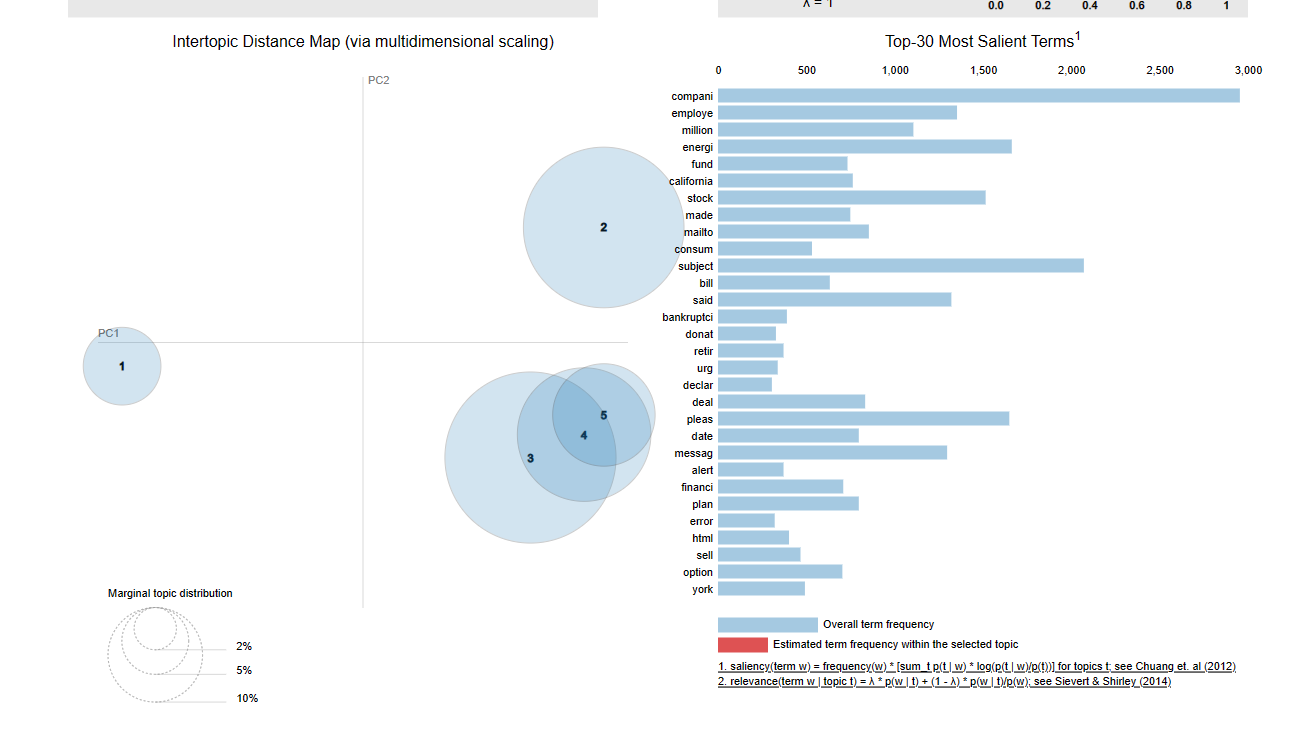

In [16]:
from IPython.display import Image, display
display(Image(filename='Enron 5 topics.png'))

### This chart clearly shows that we have too many topics, and that there are only three distinct groups. I will lower the number of topics from 5 to 3

In [19]:
ldamodel = LdaMulticore(corpus, num_topics=3, id2word=dictionary, passes=10)

topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.016*"subject" + 0.011*"corp" + 0.010*"develop" + 0.010*"market" + 0.008*"sent" + 0.007*"would" + 0.007*"origin" + 0.007*"messag" + 0.007*"thank" + 0.006*"forward"')
(1, '0.010*"pleas" + 0.009*"mailto" + 0.009*"mail" + 0.007*"date" + 0.007*"messag" + 0.007*"subject" + 0.006*"inform" + 0.006*"option" + 0.005*"email" + 0.005*"receiv"')
(2, '0.028*"compani" + 0.014*"energi" + 0.013*"said" + 0.013*"stock" + 0.012*"million" + 0.012*"employe" + 0.008*"year" + 0.008*"fund" + 0.008*"california" + 0.007*"made"')


In [20]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

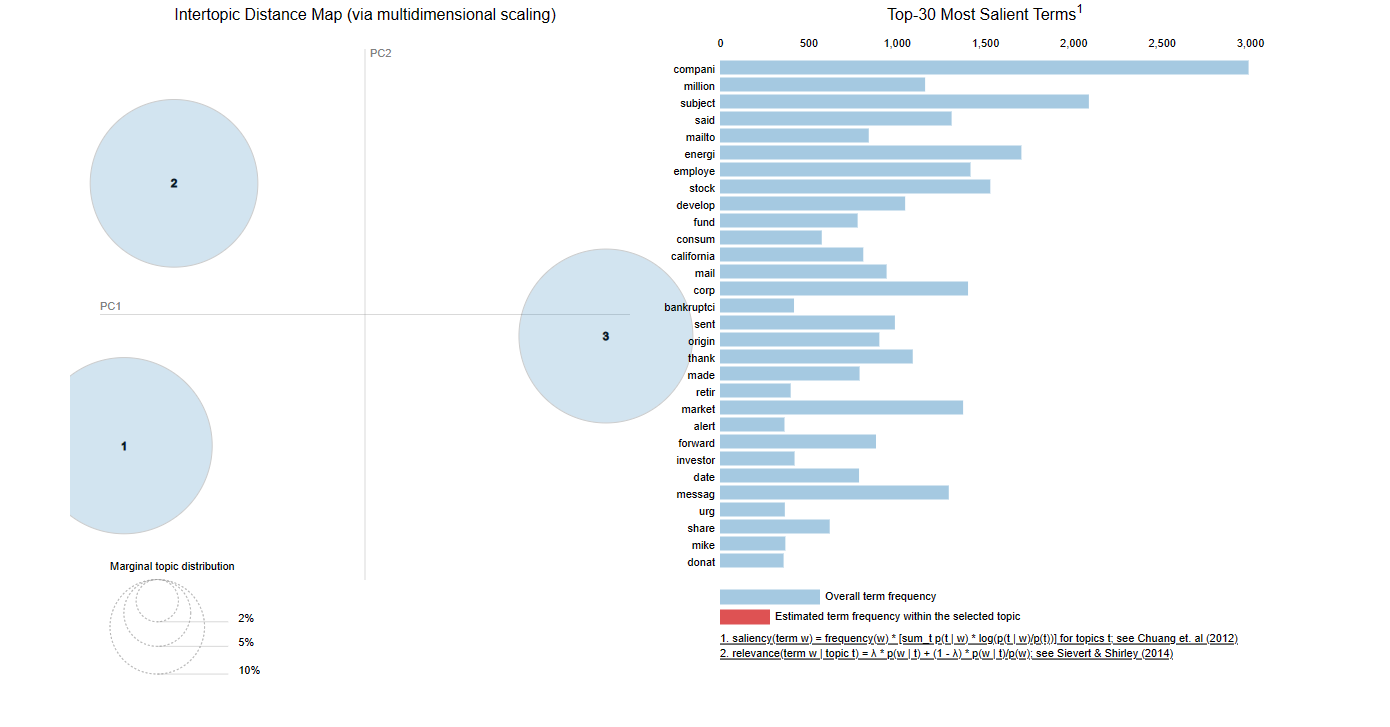

In [21]:
display(Image(filename='Enron 3 topics.png'))